Introduction to model evaluation
---

In [1]:
import pandas as pd

# Load data
data_df = pd.read_csv('three-models.csv')
data_df.head()

,temp,users,pred_lr,pred_poly3,pred_huber3
0,0.1508,41,146,44,51
1,0.1609,54,161,53,52
2,0.1727,25,178,66,55
3,0.1775,75,185,72,57
4,0.1822,74,192,78,60


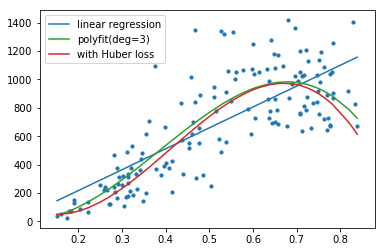

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Extract variables
x = data_df.temp.values
y = data_df.users.values

# Plot the models
plt.scatter(x, y, s=10)
plt.plot(x, data_df.pred_lr, c='C0', label='linear regression')
plt.plot(x, data_df.pred_poly3, c='C2', label='polyfit(deg=3)')
plt.plot(x, data_df.pred_huber3, c='C3', label='with Huber loss')
plt.legend()
plt.show()

In [3]:
import numpy as np

# Root mean squared error
def RMSE(y, y_pred):
    mse = np.mean(np.square(y - y_pred)) # MSE
    return np.sqrt(mse) # RMSE

rmse_lr = RMSE(y, data_df.pred_lr)
rmse_poly3 = RMSE(y, data_df.pred_poly3)
rmse_huber3 = RMSE(y, data_df.pred_huber3)

# Print values
print('linear regression:', rmse_lr) # 232.53
print('polyfit(deg=3):', rmse_poly3) # 210.55
print('with huber loss:', rmse_huber3) # 215.67

linear regression: 232.53050786099598
polyfit(deg=3): 210.55145192395318
with huber loss: 215.66518077491205


In [4]:
import numpy as np

# Mean absolute error
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

mae_lr = MAE(y, data_df.pred_lr)
mae_poly3 = MAE(y, data_df.pred_poly3)
mae_huber3 = MAE(y, data_df.pred_huber3)

# Print values
print('linear regression:', mae_lr) # 186.58
print('polyfit(deg=3):', mae_poly3) # 161.72
print('with huber loss:', mae_huber3) # 164.75


linear regression: 186.58278145695365
polyfit(deg=3): 161.71523178807948
with huber loss: 164.75496688741723


The advantage of MAE is that it has a clear interpretation. For instance, in our example, predictions from the poly3 model are wrong by, in average, 162 users. 

In [5]:
# Compute baseline
pred_baseline = np.mean(y) # equals to 674.7218543
rmse_baseline = RMSE(y, pred_baseline)
rmse_baseline # 371.11

371.11459394676217

In [6]:
# Vector with predictions from the baseline
pred_baseline = np.full_like(y, fill_value=np.mean(y), dtype=np.float)
pred_baseline # Returns: array([ 674.7218543, 674.7218543,  ...

array([674.7218543, 674.7218543, 674.7218543, 674.7218543, 674.7218543,
       674.7218543, 674.7218543, 674.7218543, 674.7218543, 674.7218543,
       674.7218543, 674.7218543, 674.7218543, 674.7218543, 674.7218543,
       674.7218543, 674.7218543, 674.7218543, 674.7218543, 674.7218543,
       674.7218543, 674.7218543, 674.7218543, 674.7218543, 674.7218543,
       674.7218543, 674.7218543, 674.7218543, 674.7218543, 674.7218543,
       674.7218543, 674.7218543, 674.7218543, 674.7218543, 674.7218543,
       674.7218543, 674.7218543, 674.7218543, 674.7218543, 674.7218543,
       674.7218543, 674.7218543, 674.7218543, 674.7218543, 674.7218543,
       674.7218543, 674.7218543, 674.7218543, 674.7218543, 674.7218543,
       674.7218543, 674.7218543, 674.7218543, 674.7218543, 674.7218543,
       674.7218543, 674.7218543, 674.7218543, 674.7218543, 674.7218543,
       674.7218543, 674.7218543, 674.7218543, 674.7218543, 674.7218543,
       674.7218543, 674.7218543, 674.7218543, 674.7218543, 674.7

In [8]:
from sklearn.dummy import DummyRegressor

# Create the DummyRegressor object
dummy = DummyRegressor(strategy='mean')

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [10]:
# Fit the estimator
dummy.fit(x[:, np.newaxis], y);

In [11]:
# Vector with predictions from the baseline
pred_baseline = dummy.predict(x[:, np.newaxis])

rmse_baseline = RMSE(y, pred_baseline)
rmse_baseline # Returns: 371.11459394676217

371.11459394676217

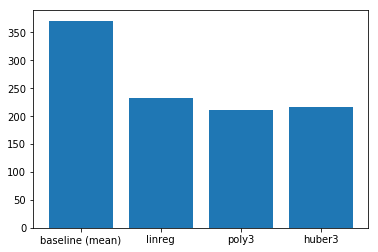

In [12]:
# Bar chart
plt.bar([1, 2, 3, 4], [rmse_baseline, rmse_lr, rmse_poly3, rmse_huber3])
plt.xticks([1, 2, 3, 4], ['baseline (mean)', 'linreg', 'poly3', 'huber3'])
plt.show()